In [16]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
df_daily_ask = pd.read_csv("Data Collection/USDJPY_Candlestick_1_D_ASK_01.01.2016-04.05.2021.csv")
print(df_daily_ask.shape)
df_daily_ask.head()

(1951, 6)


,Gmt time,Open,High,Low,Close,Volume
0,01.01.2016 00:00:00.000,120.303,120.303,120.303,120.303,0.000000e+00
1,02.01.2016 00:00:00.000,120.303,120.303,120.303,120.303,0.000000e+00
2,03.01.2016 00:00:00.000,120.233,120.393,120.221,120.320,3.842840e+09
3,04.01.2016 00:00:00.000,120.319,120.469,118.705,119.474,1.378518e+11
4,05.01.2016 00:00:00.000,119.477,119.699,118.797,119.115,1.510429e+11


In [6]:
df_daily_bid = pd.read_csv("Data Collection/USDJPY_Candlestick_1_D_BID_01.01.2016-04.05.2021.csv")
print(df_daily_bid.shape)
df_daily_bid.head()

(1951, 6)


,Gmt time,Open,High,Low,Close,Volume
0,01.01.2016 00:00:00.000,120.230,120.230,120.230,120.230,0.000000e+00
1,02.01.2016 00:00:00.000,120.230,120.230,120.230,120.230,0.000000e+00
2,03.01.2016 00:00:00.000,120.188,120.385,120.183,120.316,4.554270e+09
3,04.01.2016 00:00:00.000,120.315,120.464,118.703,119.469,1.466928e+11
4,05.01.2016 00:00:00.000,119.475,119.694,118.794,119.110,1.562939e+11


In [14]:
def get_avg_price(df_daily_ask,df_daily_bid):
    
    avg_price = []
    
    for i in range(df_daily_ask.shape[0]):
        pr = (df_daily_ask['Close'].iloc[i]+df_daily_bid['Close'].iloc[i])/2
        dt = df_daily_ask['Gmt time'].iloc[i]
        avg_price.append([dt,pr])
        
    df = pd.DataFrame(avg_price)
    df.columns=["date","price"]
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', ascending=True, inplace=True)
    
    return df

def price_direction(df):
    
    direction = []
    direction.append("up")
    
    for i in range(1, df.shape[0]):
        
        diff = df['price'].iloc[i] - df['price'].iloc[i-1]
        
        if diff>=0:
            direction.append("up")
        else:
            direction.append("down")
            
    df['price_direction'] = pd.Series(direction, index=df.index)
    
    return df

In [15]:
df = get_avg_price(df_daily_ask,df_daily_bid)
df = price_direction(df)
df.head()

,date,price,price_direction
0,2016-01-01,120.2665,up
31,2016-01-02,120.8575,up
60,2016-01-03,113.9180,down
91,2016-01-04,111.6515,down
121,2016-01-05,106.4375,down


<AxesSubplot:xlabel='date'>

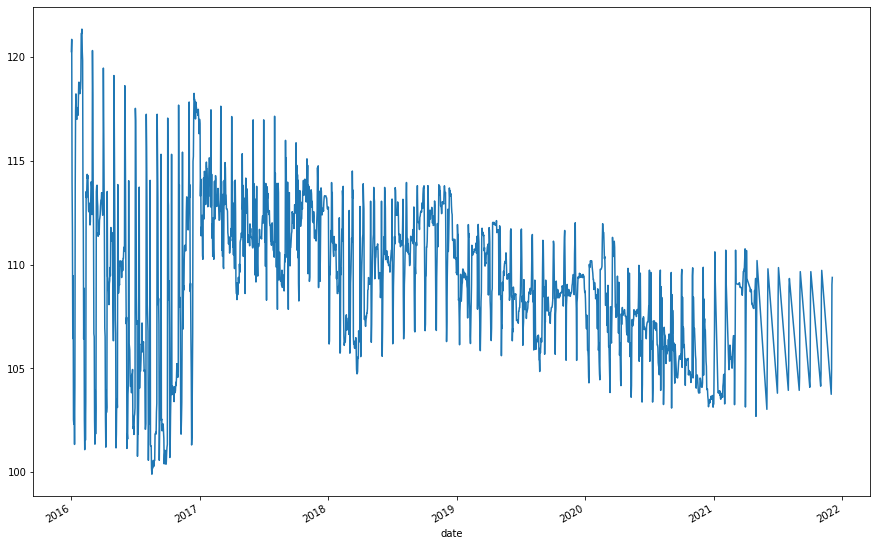

In [20]:
df.index = df.date
df['price'].plot.line(figsize=(15, 10))

In [21]:
df.to_csv("Data/usdjpy_daily.csv",index=False)